<a href="https://colab.research.google.com/github/roy2392/ADVENTUREWORKS_SQL/blob/main/Paris_House_Prices_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the Data

In [1]:
# General tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import the data
df = pd.read_csv('ParisHousing.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [63]:
df.loc[df['numberOfRooms'] < df['floors']].shape

(4991, 12)

In [16]:
#inspect the data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [14]:
# inspecting general statistics of the data
df.price = df.price.astype('float')
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,49870.13,50.36,0.51,0.50,50.28,50225.49,5.51,5.52,2005.49,0.50,0.50,5033.10,5028.01,553.12,0.50,4.99,4993447.10
std,28774.38,28.82,0.50,0.50,28.89,29006.68,2.87,2.86,9.31,0.50,0.50,2876.73,2894.33,262.05,0.50,3.18,2877424.11
min,89.00,1.00,0.00,0.00,1.00,3.00,1.00,1.00,1990.00,0.00,0.00,0.00,1.00,100.00,0.00,0.00,10313.00
25%,25098.50,25.00,0.00,0.00,25.00,24693.75,3.00,3.00,1997.00,0.00,0.00,2559.75,2512.00,327.75,0.00,2.00,2516401.50
50%,50105.50,50.00,1.00,0.00,50.00,50693.00,5.00,5.00,2005.50,0.00,0.00,5092.50,5045.00,554.00,1.00,5.00,5016179.50
75%,74609.75,75.00,1.00,1.00,76.00,75683.25,8.00,8.00,2014.00,1.00,1.00,7511.25,7540.50,777.25,1.00,8.00,7469092.00
max,99999.00,100.00,1.00,1.00,100.00,99953.00,10.00,10.00,2021.00,1.00,1.00,10000.00,10000.00,1000.00,1.00,10.00,10006771.00


after reviewing the data, we see that we seen serval issues with the data:
1. some of the houses have more floors than rooms
2. the range of the prices is large, the gap between the min is around 1000%

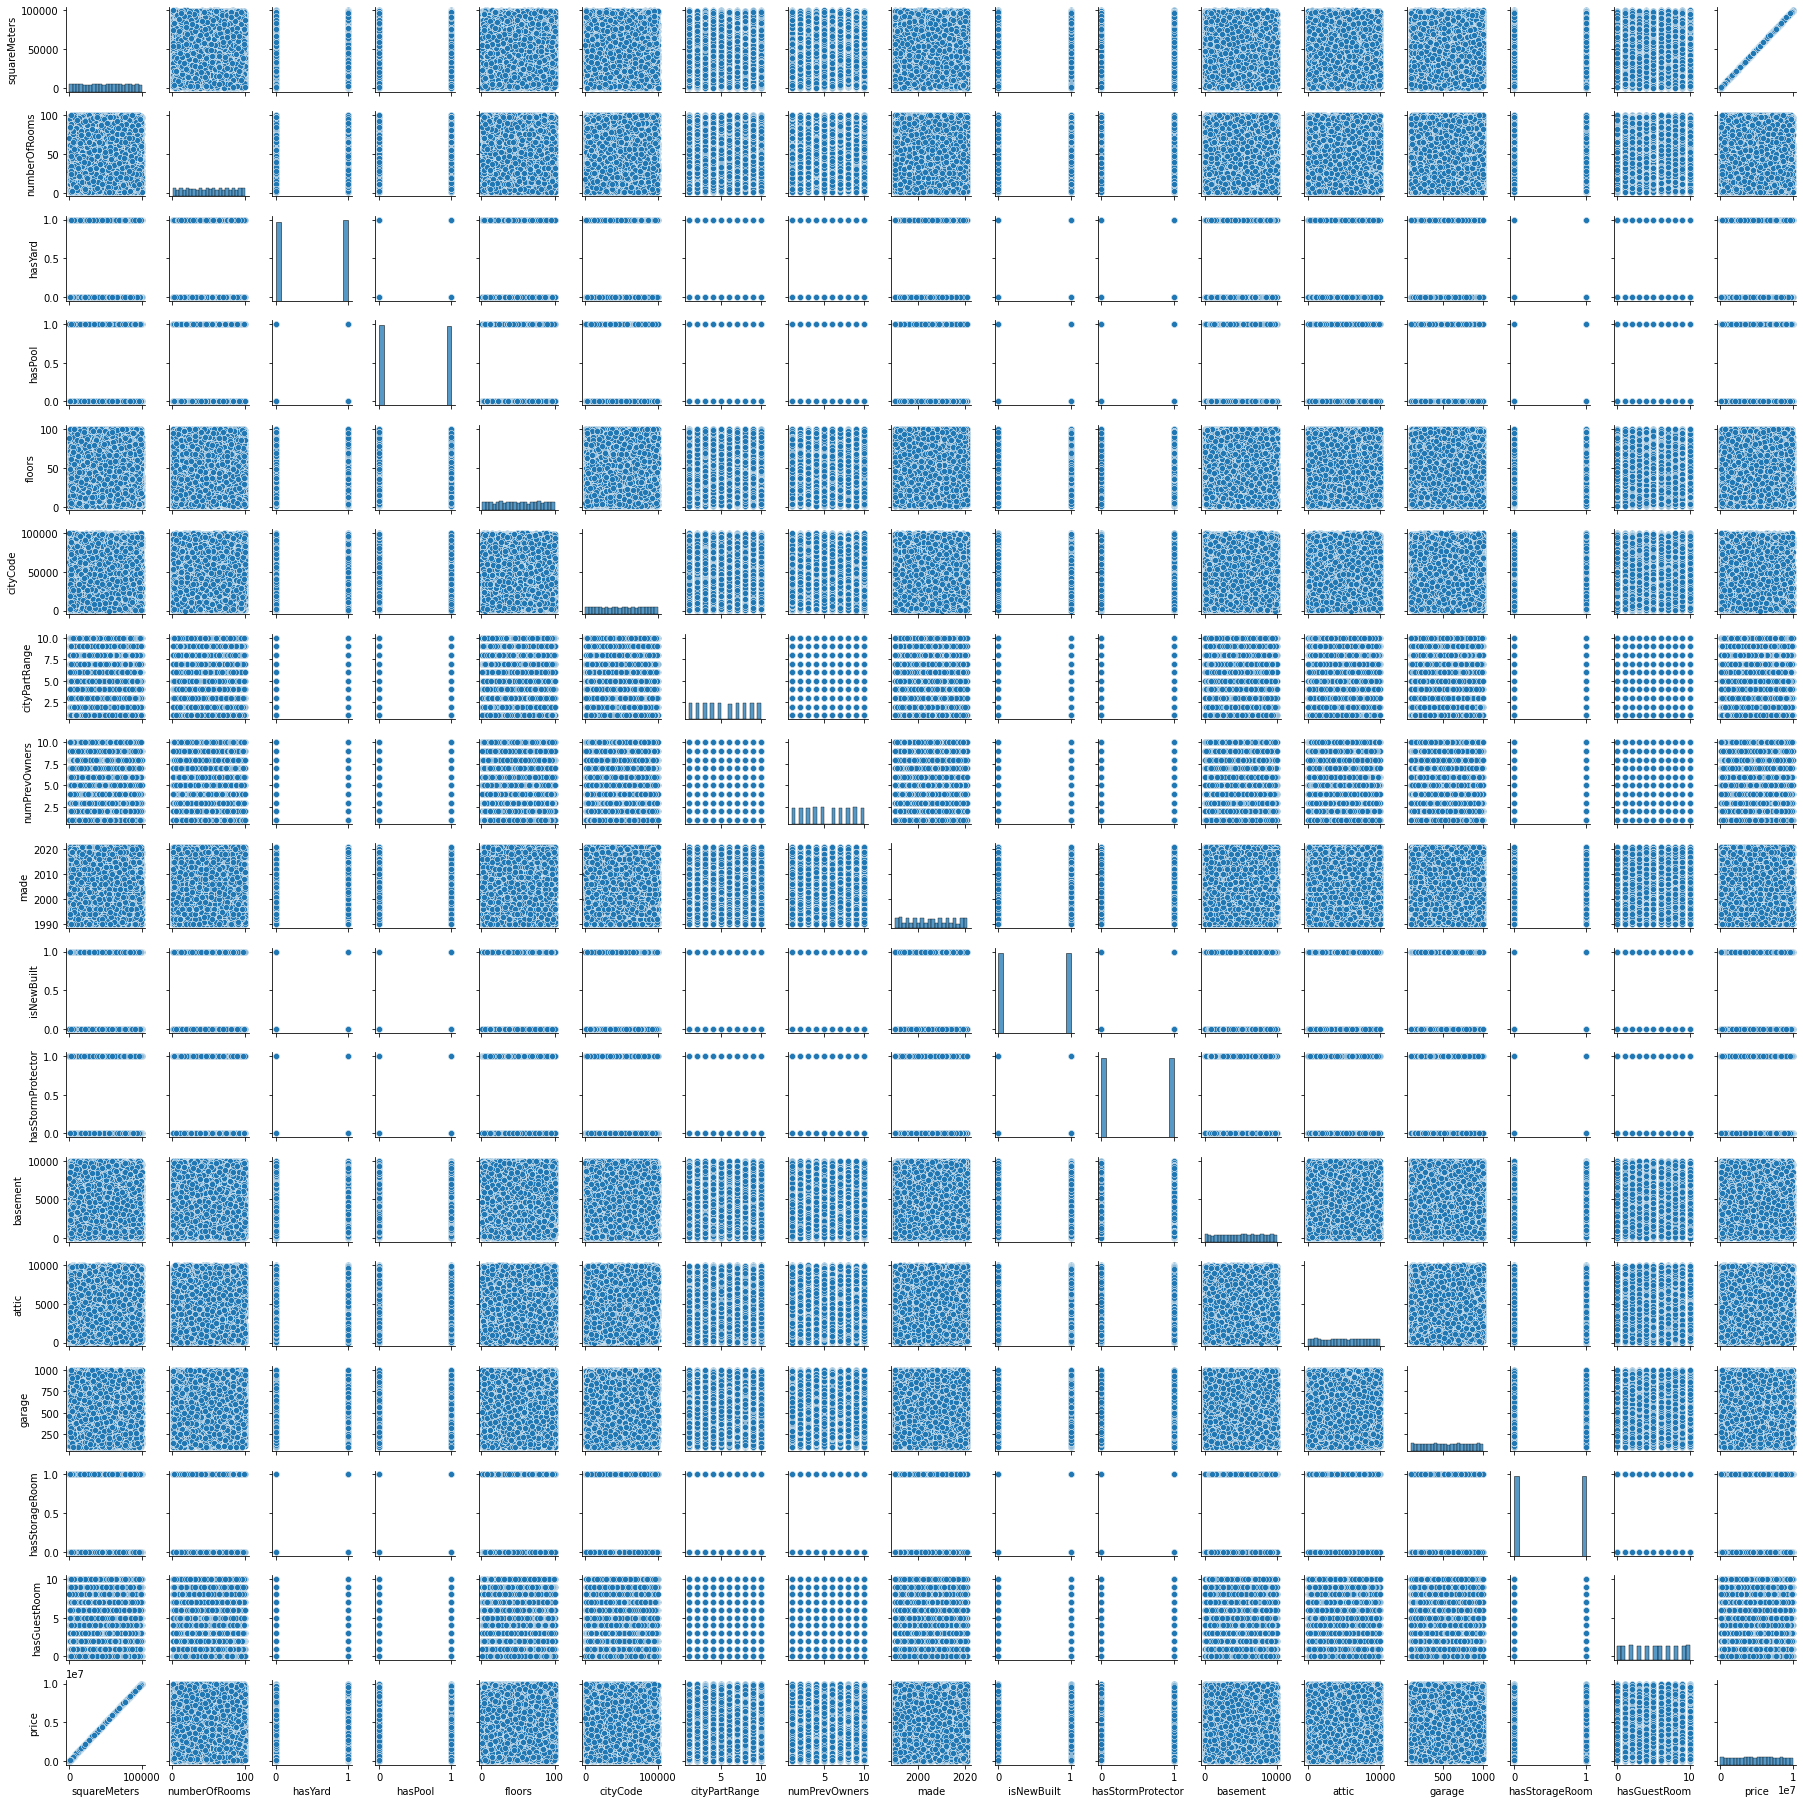

In [17]:
sns.pairplot(df,height = 1.5)

# Cleaning

## Removing Columns

In [24]:
df.drop(['numPrevOwners','isNewBuilt','hasStormProtector','hasStorageRoom','hasGuestRoom'],axis = 1 ,inplace = True)

We seen that the columns:
- numPrevOwners
- isNewBuilt
- hasStormProtector
- hasStorageRoom
- hasGuestRoom

had small effect on the price, it can be noisy data so we removed it 

## Removing Outliers

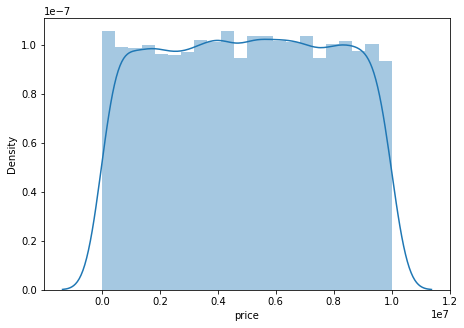

In [48]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['price'])
plt.show()

<Axes: xlabel='squareMeters', ylabel='price'>

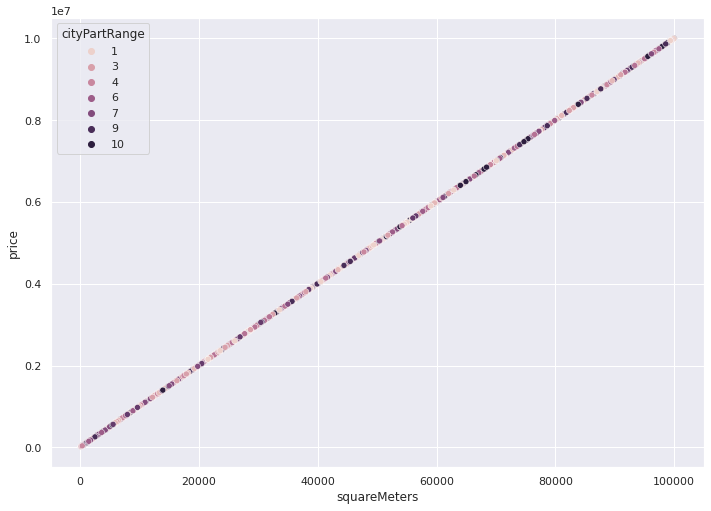

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(df, x='squareMeters' , y='price' , hue = 'cityPartRange' )

In [65]:
df.price

0      7559081.00
1      8085989.00
2      5574642.00
3      3232561.00
4      7055052.00
          ...    
9995    176425.00
9996   4448474.00
9997   8390030.00
9998   5905107.00
9999    146708.00
Name: price, Length: 10000, dtype: float64

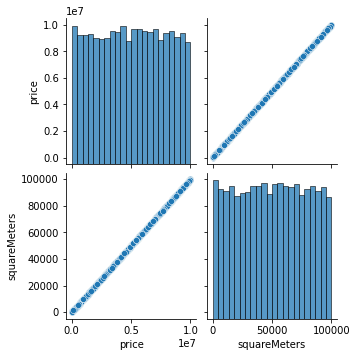

In [52]:
sns.pairplot(df,vars=['price' ,'squareMeters' ])

# Questionable Data

# Feature Selection

# Relevance

# Correlation

#Preprocessing

# Categorical Data

# Splitting The Data

# Linear Regression

## Fitting the Model

## Predict

## Validating The Model